<a href="https://colab.research.google.com/github/ArifaAsha/ArifaAsha.github.io/blob/master/MachineLearning/weighBridgeProject/weighBridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
import pandas as pd
file_path = '/content/weighBridgeDB_Dev.dataset.csv'
data = pd.read_csv(file_path)

#1. EDA


##1.1 Conversion: batteryQty value 'Yes (x2)*' to Quantity 2

In [275]:
def get_battery_quantity(file_path):
    df = pd.read_csv(file_path)

    def extract_number(s):
        if isinstance(s, str):
            parts = s.split('(x')
            if len(parts) > 1:
                number_part = parts[1].split(')')[0]
                try:
                    return int(number_part)
                except ValueError:
                    return None
        return None

    df['batteryQty'] = df['batteryQty'].apply(extract_number).fillna(0).astype(int)

    df.to_csv('updated_weighBridgeDB_Dev_dataset.csv', index=False)

    print(df)

In [276]:
get_battery_quantity(file_path)
batteryQtyUpdate_data = pd.read_csv('/content/updated_weighBridgeDB_Dev_dataset.csv')

                          _id  chassisNo   modelName  aFrameLength  \
0    66c44c85267ce76cc9d80c23      13187      ARAMIS        1850.0   
1    66c44c85267ce76cc9d80c24      12784     EXTREME        1850.0   
2    66c44c85267ce76cc9d80c25      11328      ARAMIS        1450.0   
3    66c44c86267ce76cc9d80c26      13110   HURRICANE        1600.0   
4    66c44c86267ce76cc9d80c27      13587    SERENITY        1850.0   
..                        ...        ...         ...           ...   
911  66c44d40267ce76cc9d80fb2      14525  LIBERTY SV           0.0   
912  66c44d40267ce76cc9d80fb3      14940    TREVILLE           0.0   
913  66c44d40267ce76cc9d80fb4      12976        DUKE           0.0   
914  66c44d40267ce76cc9d80fb5      14017     CAMELOT           0.0   
915  66c45b09d9625a05f017fa92       2022         NaN        1600.0   

     frontLength  wheelboxSize  rearLength  doorPosition  \
0         2618.0        1740.0      1761.0        1083.0   
1         2575.0        1740.0      200

##1.2 Find Categorical Columns

In [277]:
for col in ['tyreSize', 'rimSizeAndProfile', 'spareWheel', 'suspensionType', 'suspensionRating', 'toolBoxModel']:
    print("Column : {}".format(col))
    print(batteryQtyUpdate_data[col].value_counts())
    print()

Column : tyreSize
tyreSize
235 / 75 R15    364
265 / 75 R16    235
245 / 75 R16    220
265 / 70 R17     37
275 / 70 R18     34
205 / 70 R15     24
265 / 65 R18      1
Name: count, dtype: int64

Column : rimSizeAndProfile
rimSizeAndProfile
R16 X 6 STUD     455
R15 X 6 STUD     388
R17 X 6 STUD      37
R 18 X 8 STUD     15
R18 X 6 STUD      13
R 18 X 6 STUD      2
R18 X 8 STUD       2
Name: count, dtype: int64

Column : spareWheel
spareWheel
(x1) spare & (x1) bracket                    880
(x2) Spares & (x2) Brackets*                  12
Sway Control System                            5
(x1) Spare & (x1) Bracket*                     3
Sway Control System*                           3
(x1) Spare & (x1) Bracket (Supply loose)*      1
12'' Electric (Drum)*                          1
(x1) Spare & (x2) Brackets*                    1
Name: count, dtype: int64

Column : suspensionType
suspensionType
Independent 2.7T - TuffRide (Coil)               150
1600kg (x2) - Roller Rocker                  

##1.3 Correlation Matrix

####Conversion: Categorical to Numeric

### 1.3.1  Assigning unique numbers

In [278]:
def data_cleaning(df):
    # Drop unnecessary columns
    df = df.drop(columns=['_id', 'chassisNo', 'ImageData'])

    # Define the columns to check
    columns_to_check = ['aFrameLength', 'frontLength', 'wheelboxSize', 'rearLength', 'doorPosition',
                        'overallChassisLength']

    # Filter out rows where any of the specified columns have a value of 0
    df = df[~(df[columns_to_check] == 0).any(axis=1)]

    df['modelName'] = df['modelName'].astype('category').cat.codes
    df['tyreSize'] = df['tyreSize'].astype('category').cat.codes
    df['rimSizeAndProfile'] = df['rimSizeAndProfile'].astype('category').cat.codes
    df['spareWheel'] = df['spareWheel'].astype('category').cat.codes
    df['rimSizeAndProfile'] = df['rimSizeAndProfile'].astype('category').cat.codes
    df['suspensionType'] = df['suspensionType'].astype('category').cat.codes
    df['suspensionRating'] = df['suspensionRating'].astype('category').cat.codes
    df['toolBoxModel'] = df['toolBoxModel'].astype('category').cat.codes
    df['rimSizeAndProfile'] = df['rimSizeAndProfile'].astype('category').cat.codes
    df['suspensionType'] = df['suspensionType'].astype('category').cat.codes
    df['suspensionRating'] = df['suspensionRating'].astype('category').cat.codes

    df.to_csv(output_file_path, index=False)

input_file_path = 'updated_weighBridgeDB_Dev_dataset.csv'
output_file_path = 'cleaned_weighBridgeDB_Dev_dataset.csv'

df = pd.read_csv(input_file_path)



In [279]:
df = data_cleaning(batteryQtyUpdate_data)
df = pd.read_csv('/content/cleaned_weighBridgeDB_Dev_dataset.csv')
cor_matrix = df.corr().abs()

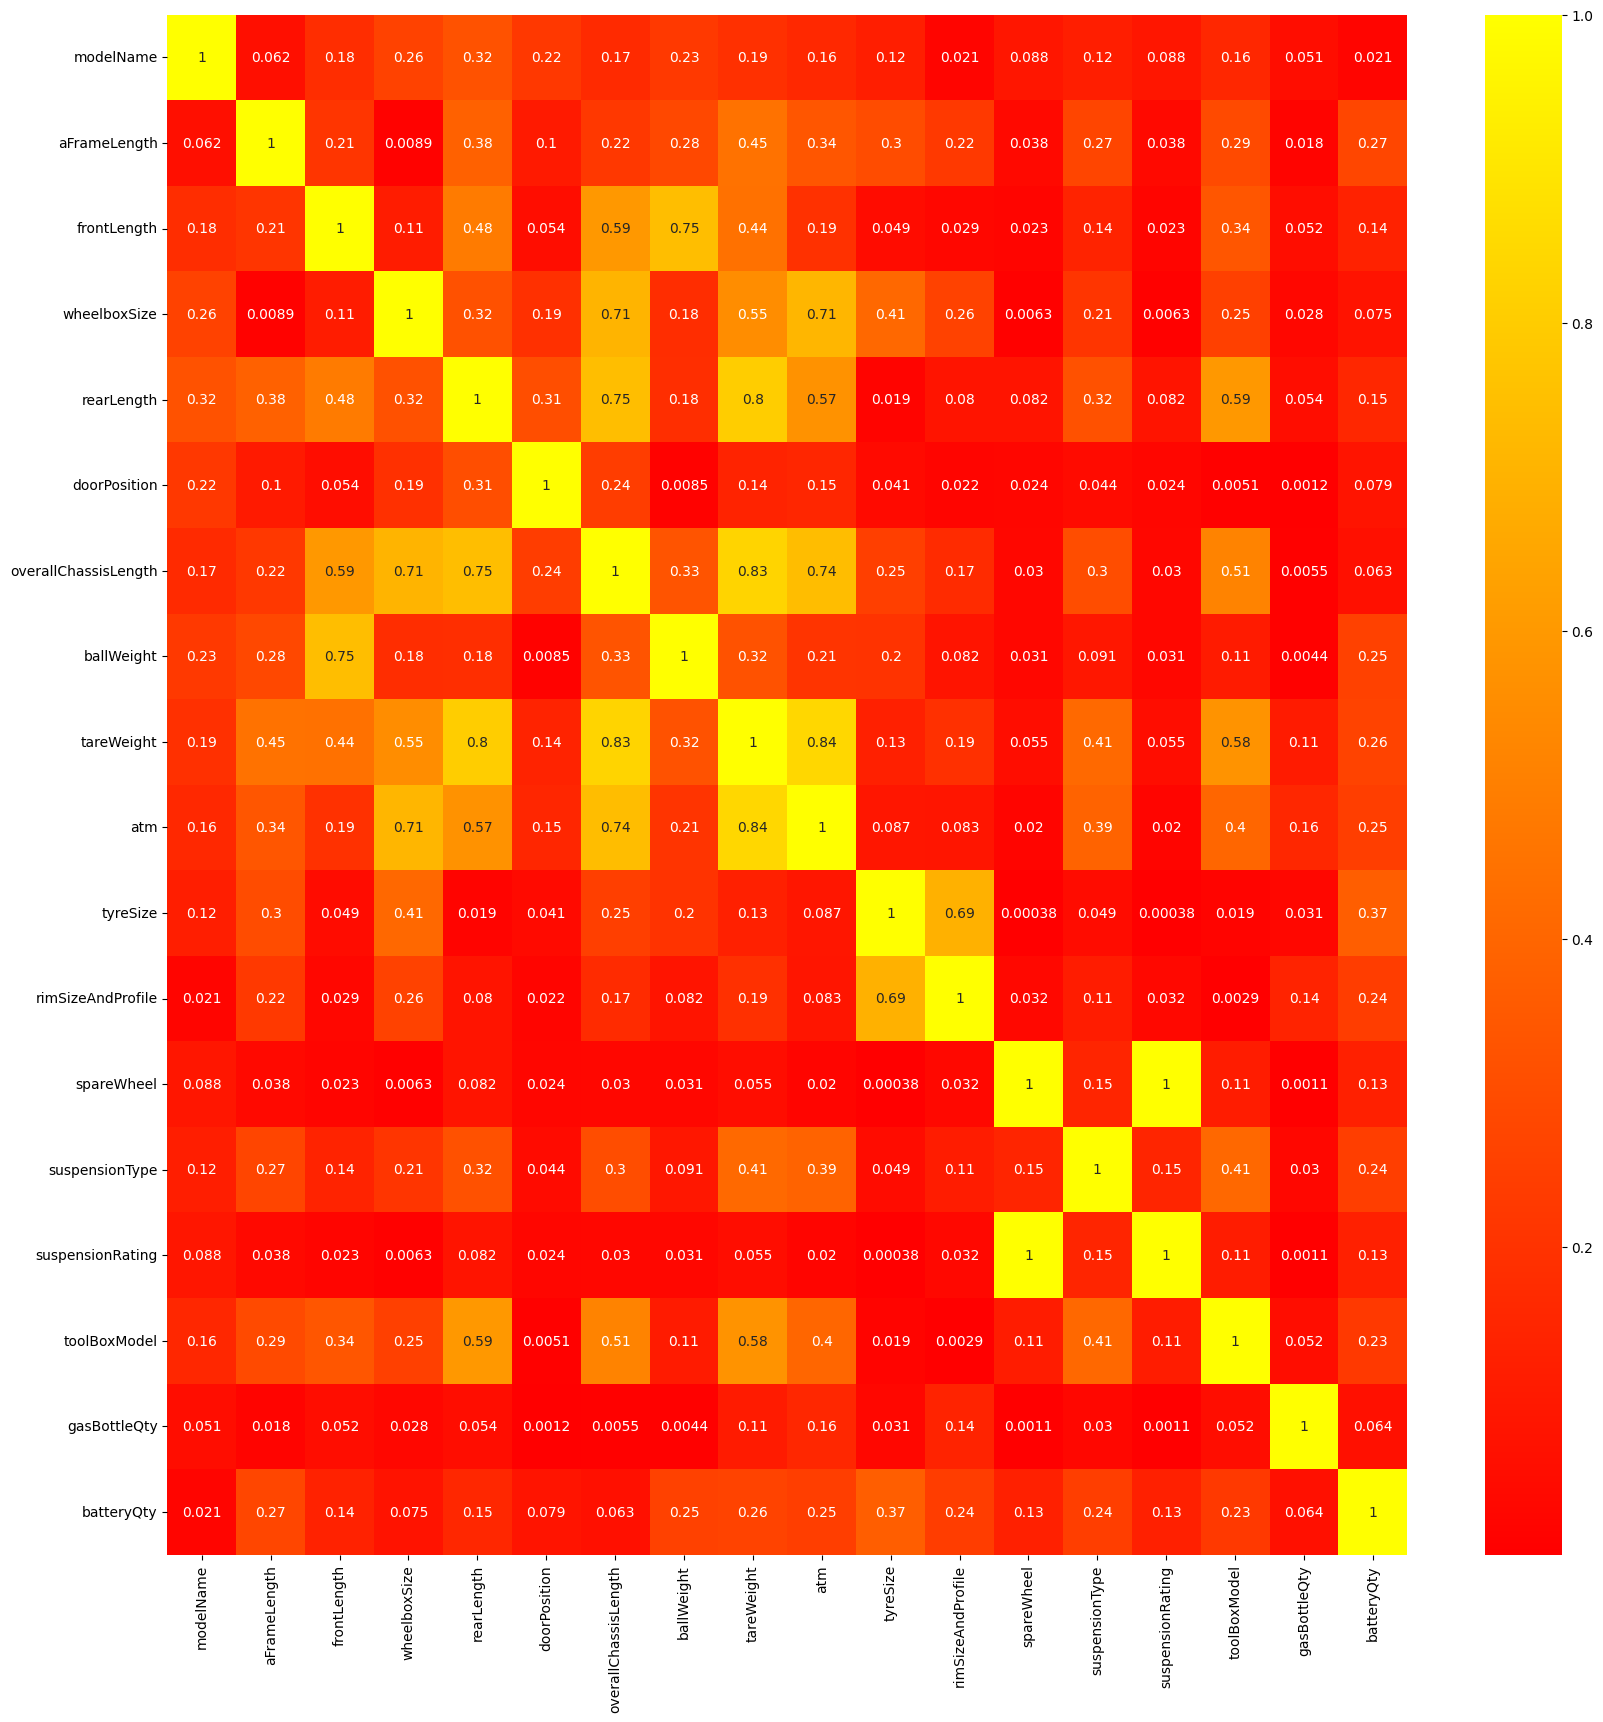

In [280]:
f, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(cor_matrix, cmap='autumn', annot=True)

### 1.3.2 Using Label Encoder

In [281]:
initial_data = pd.read_csv('/content/weighBridgeDB_Dev.dataset.csv')
get_battery_quantity(file_path)

data = pd.read_csv('/content/updated_weighBridgeDB_Dev_dataset.csv')
data = data.drop(columns=['_id', 'chassisNo', 'ImageData'])

columns_to_check = ['aFrameLength', 'frontLength', 'wheelboxSize', 'rearLength', 'doorPosition',
                    'overallChassisLength']

# Filter out rows where any of the specified columns have a value of 0
data = data[~(data[columns_to_check] == 0).any(axis=1)]

data['modelName_encod'] = LabelEncoder().fit_transform(np.asarray(data.modelName))
data['tyreSize_encod'] = LabelEncoder().fit_transform(np.asarray(data.tyreSize))
data['rimSizeAndProfile_encod'] = LabelEncoder().fit_transform(np.asarray(data.rimSizeAndProfile))
data['spareWheel_encod'] = LabelEncoder().fit_transform(np.asarray(data.spareWheel))
data['suspensionType_encod'] = LabelEncoder().fit_transform(np.asarray(data.suspensionType))
data['suspensionRating_encod'] = LabelEncoder().fit_transform(np.asarray(data.suspensionRating))
data['toolBoxModel_encod'] = LabelEncoder().fit_transform(np.asarray(data.toolBoxModel))
data = data.drop(columns=['modelName', 'tyreSize', 'rimSizeAndProfile', 'spareWheel', 'suspensionType', 'suspensionRating', 'toolBoxModel'])

                          _id  chassisNo   modelName  aFrameLength  \
0    66c44c85267ce76cc9d80c23      13187      ARAMIS        1850.0   
1    66c44c85267ce76cc9d80c24      12784     EXTREME        1850.0   
2    66c44c85267ce76cc9d80c25      11328      ARAMIS        1450.0   
3    66c44c86267ce76cc9d80c26      13110   HURRICANE        1600.0   
4    66c44c86267ce76cc9d80c27      13587    SERENITY        1850.0   
..                        ...        ...         ...           ...   
911  66c44d40267ce76cc9d80fb2      14525  LIBERTY SV           0.0   
912  66c44d40267ce76cc9d80fb3      14940    TREVILLE           0.0   
913  66c44d40267ce76cc9d80fb4      12976        DUKE           0.0   
914  66c44d40267ce76cc9d80fb5      14017     CAMELOT           0.0   
915  66c45b09d9625a05f017fa92       2022         NaN        1600.0   

     frontLength  wheelboxSize  rearLength  doorPosition  \
0         2618.0        1740.0      1761.0        1083.0   
1         2575.0        1740.0      200

In [282]:
data.head()

,aFrameLength,frontLength,wheelboxSize,rearLength,doorPosition,overallChassisLength,ballWeight,tareWeight,atm,gasBottleQty,batteryQty,modelName_encod,tyreSize_encod,rimSizeAndProfile_encod,spareWheel_encod,suspensionType_encod,suspensionRating_encod,toolBoxModel_encod
0,1850.0,2618.0,1740.0,1761.0,1083.0,6119.0,213.0,2683.0,3500.0,2.0,2,0,4,2,2,45,2,6
1,1850.0,2575.0,1740.0,2001.0,1323.0,6316.0,159.0,2922.0,3500.0,2.0,2,7,3,3,2,45,2,6
2,1450.0,2618.0,1740.0,1761.0,1083.0,6119.0,154.0,2275.0,3200.0,2.0,2,0,1,1,2,45,2,6
4,1850.0,2875.0,1740.0,1951.0,1273.0,6566.0,181.0,2731.0,3500.0,2.0,2,15,4,2,2,36,2,9
6,1850.0,2947.0,1740.0,2260.0,2092.0,6947.0,243.0,2880.0,3500.0,2.0,2,3,1,1,2,35,2,9


In [283]:
print(data.isnull().values.any())
data['gasBottleQty'] = data['gasBottleQty'].fillna(0)
print(data.isnull().values.any())


True
False


In [284]:
data = data.dropna()
data[data.isnull().any(axis=1)]
print(data.shape)

(272, 18)


In [285]:
cor_mat = data.corr().abs()

In [286]:
data.sample(10)

,aFrameLength,frontLength,wheelboxSize,rearLength,doorPosition,overallChassisLength,ballWeight,tareWeight,atm,gasBottleQty,batteryQty,modelName_encod,tyreSize_encod,rimSizeAndProfile_encod,spareWheel_encod,suspensionType_encod,suspensionRating_encod,toolBoxModel_encod
353,1950.0,3359.5,1740.0,2022.5,1342.5,7122.0,237.0,2897.0,3500.0,2.0,2,13,1,1,2,35,2,9
72,1850.0,2618.0,1740.0,1761.0,1083.0,6119.0,181.0,2270.0,3200.0,2.0,1,14,1,1,2,1,2,0
294,1950.0,3359.5,1740.0,2022.5,1342.5,7122.0,279.0,2946.0,3500.0,2.0,2,13,4,2,2,36,2,9
201,1850.0,2875.0,1740.0,1951.0,1273.0,6566.0,171.0,2755.0,3500.0,2.0,1,15,4,2,2,36,2,9
233,1850.0,2575.0,1740.0,1951.0,1271.0,6266.0,161.0,2654.0,3300.0,2.0,2,5,1,1,2,31,2,9
173,1850.0,2575.0,1740.0,2001.0,1323.0,6316.0,175.0,2955.0,3700.0,2.0,1,7,3,3,2,31,2,9
111,1850.0,2952.8,870.0,1837.0,1081.0,5659.8,250.0,2315.0,3000.0,2.0,2,2,4,2,2,1,2,13
354,1850.0,2575.0,1740.0,1951.0,1271.0,6266.0,162.0,2668.0,3500.0,2.0,2,9,1,1,2,49,2,9
312,1850.0,2575.0,1740.0,2001.0,1323.0,6316.0,158.0,2956.0,3500.0,0.0,0,7,3,3,6,52,6,13
36,1450.0,2448.0,1740.0,1736.0,1056.0,5924.0,142.0,2236.0,3200.0,2.0,1,11,1,1,2,36,2,4


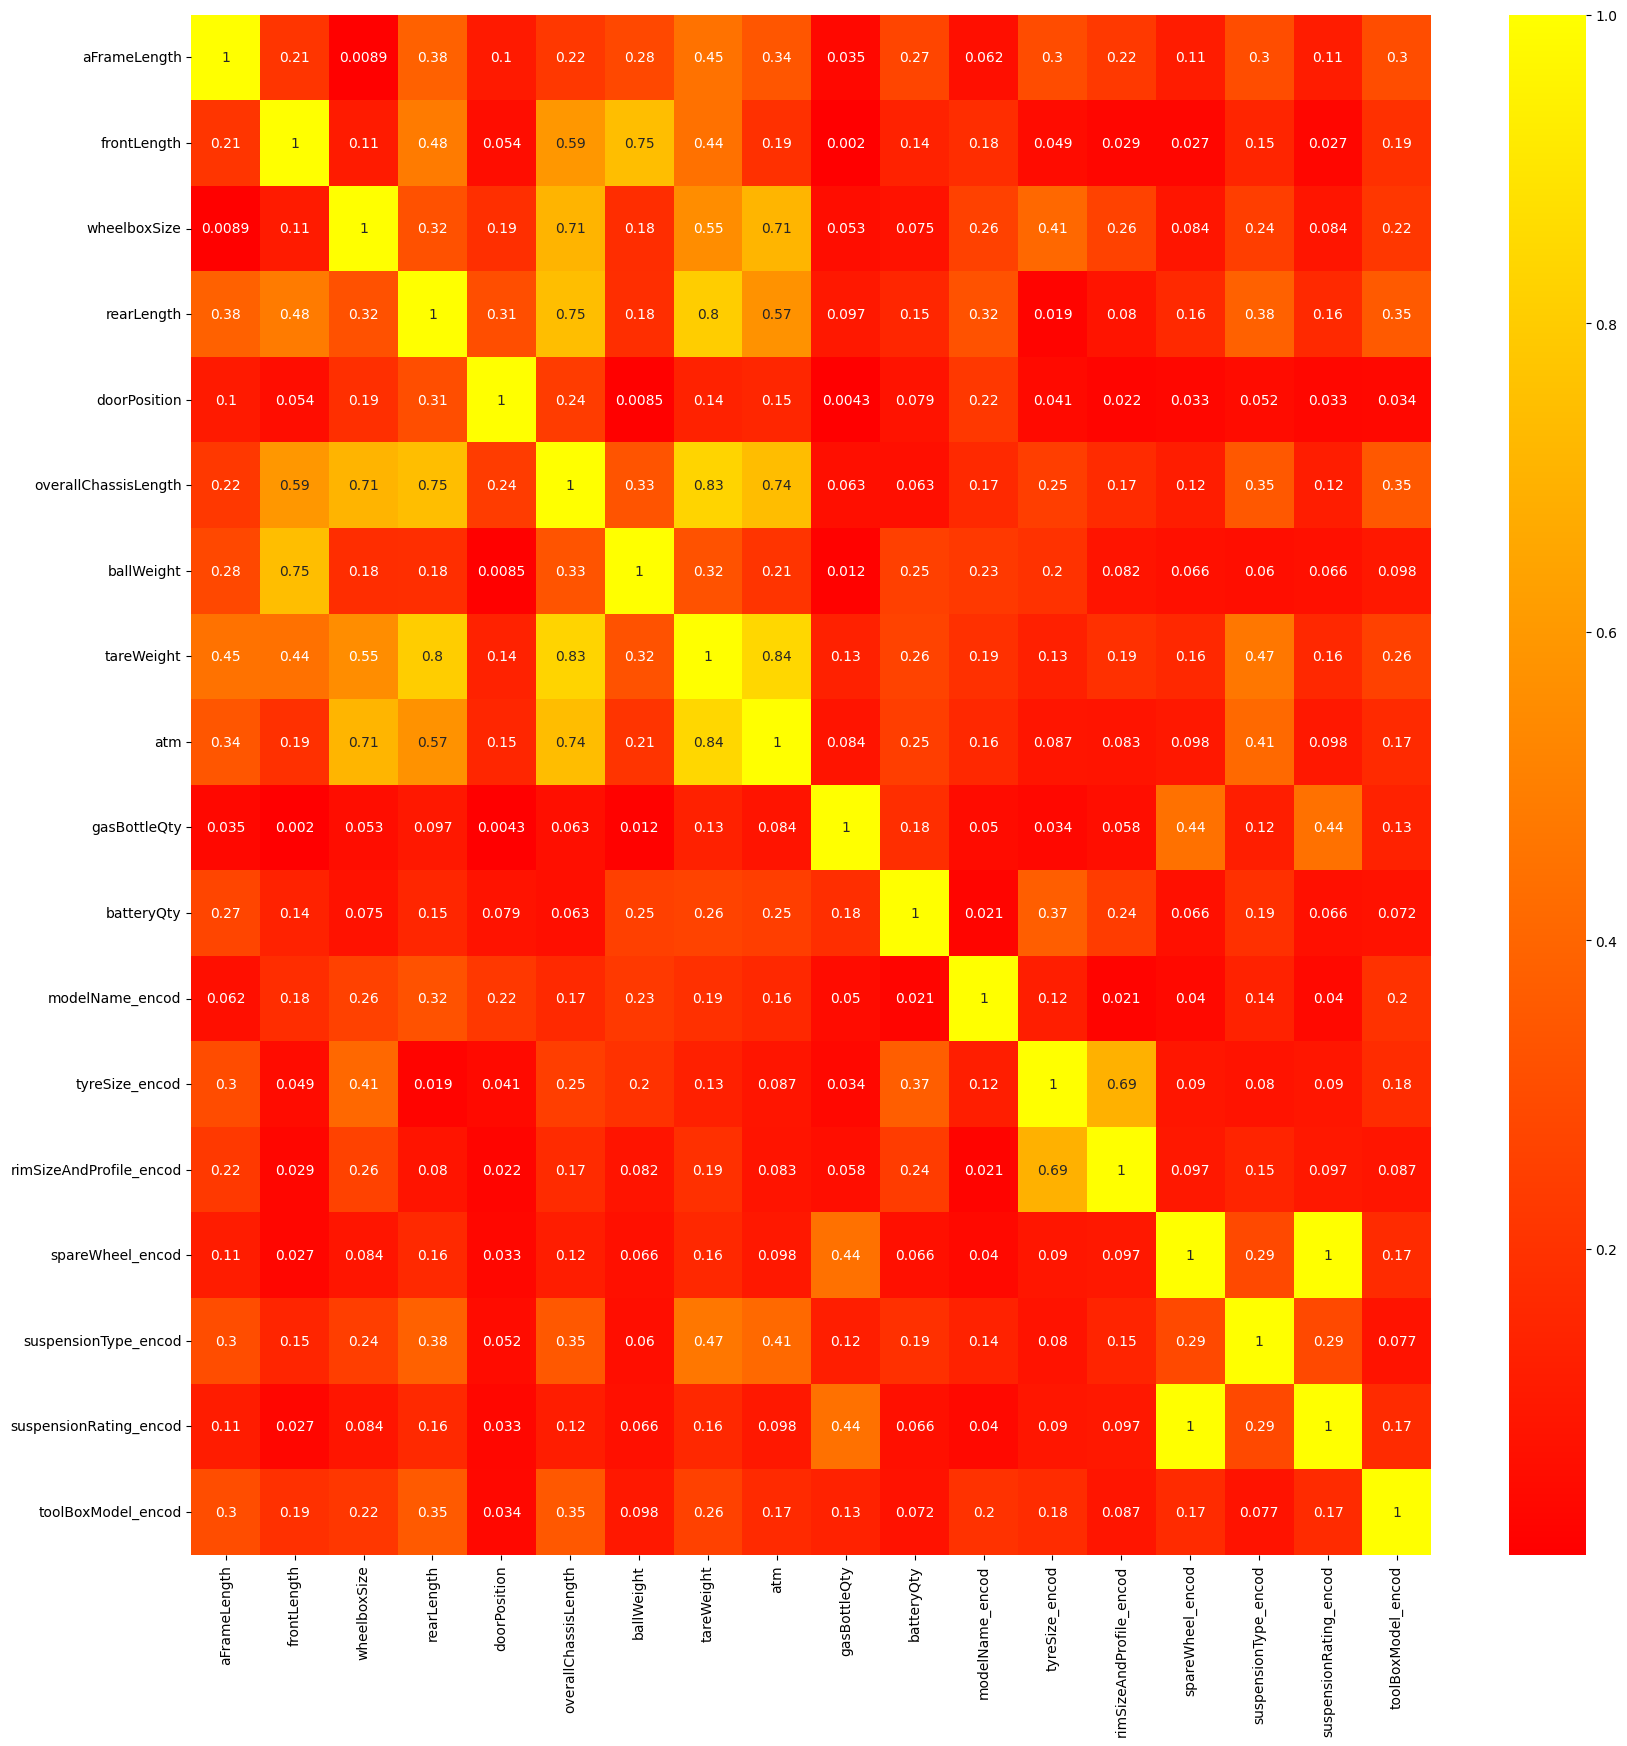

In [287]:
f, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(cor_mat, cmap='autumn', annot=True)
plt.show()

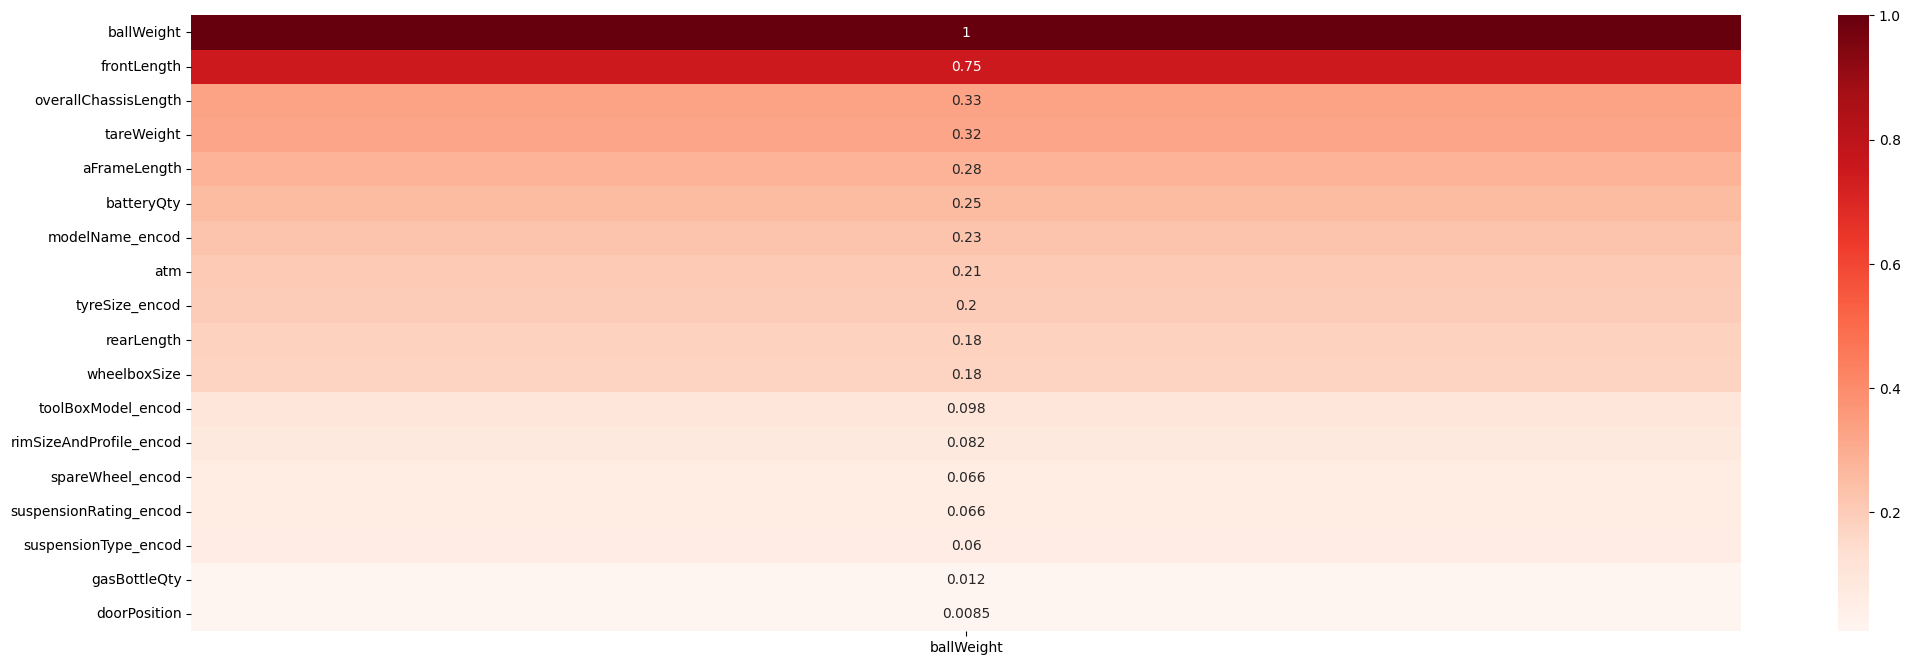

In [288]:
# Extract correlation with the target column
target_correlation = cor_mat[['ballWeight']].sort_values(by='ballWeight', ascending=False)

# Plot the heatmap
plt.figure(figsize=(25, 8))
sns.heatmap(target_correlation, annot=True, cmap=plt.cm.Reds)
# sns.heatmap(target_correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title(f'Correlation with {'ballWeight'}')
plt.show()

##1.4 Assign labels to features based on their rank

In [289]:
def generate_labels(n):
    letters = string.ascii_lowercase
    labels = []
    for i in range(n):
        label = ''
        num = i
        while num >= 0:
            label = letters[num % 26] + label
            num = num // 26 - 1
        labels.append(label)
    return labels


### 1.4.1 Ball Weight

#### 1.4.1.1 Ball Weight: Plot Sorted Heatmap


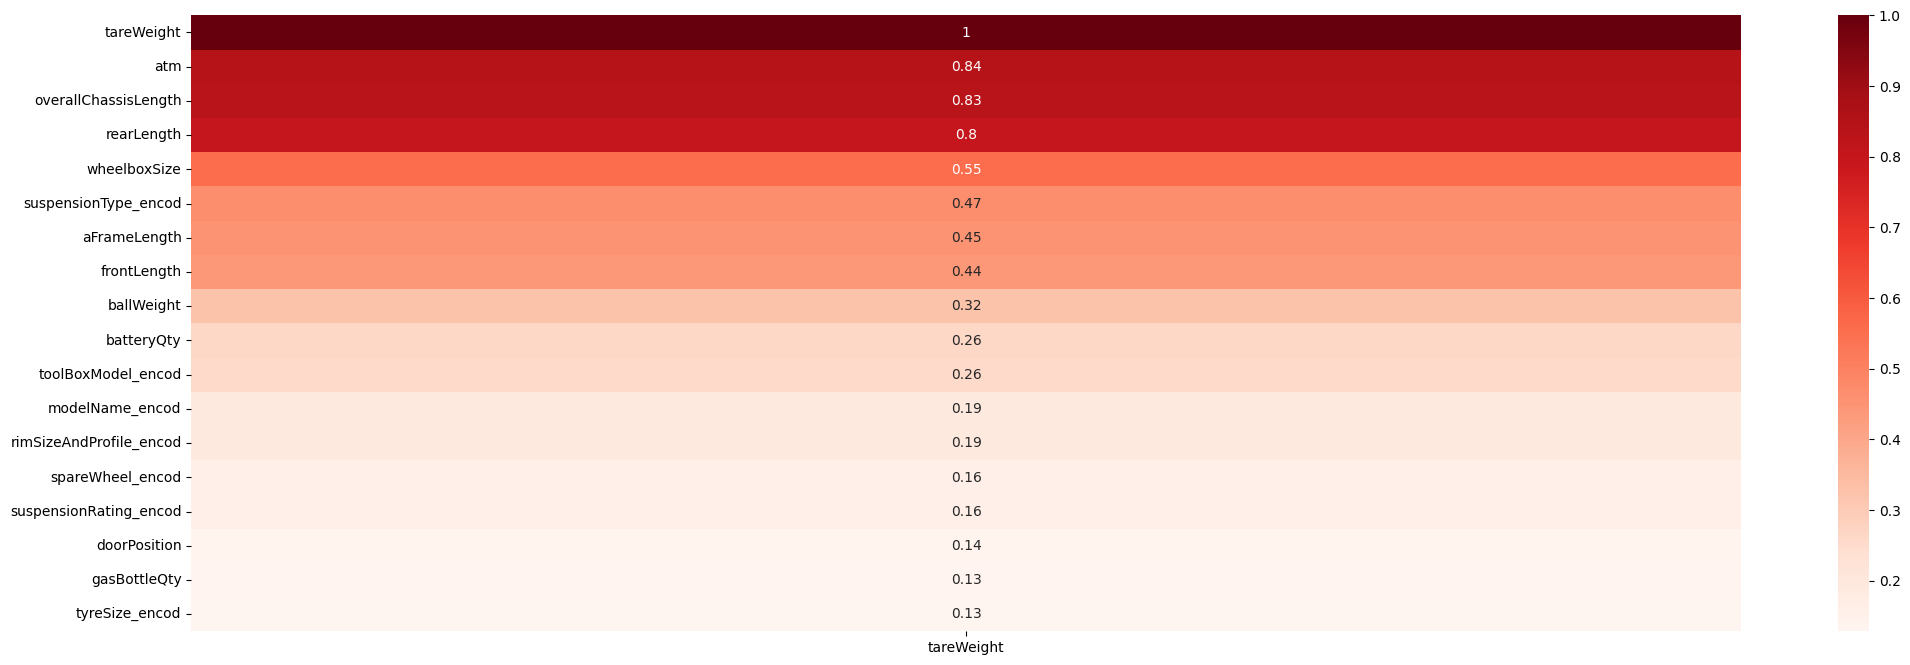

In [290]:
target_correlation = cor_mat[['tareWeight']].sort_values(by='tareWeight', ascending=False)

plt.figure(figsize=(25, 8))
sns.heatmap(target_correlation, annot=True, cmap=plt.cm.Reds)

plt.show()

####1.4.1.2 Ball Weight: Extract Newly Labeled CSV

In [291]:
# Extract correlations of 'ballWeight' with other features
ballWeight_correlations = cor_mat['ballWeight'].drop('ballWeight')

# Sort the correlations in descending order
sorted_correlations = ballWeight_correlations.sort_values(ascending=False)

# Generate labels for the number of features
num_features = len(sorted_correlations)
labels = generate_labels(num_features)

# Create a mapping from sorted features to labels
feature_labels = dict(zip(sorted_correlations.index, labels))

# Rename the columns in the DataFrame based on the sorted order
data_renamed = data.rename(columns=feature_labels)

# Display the DataFrame with new column names
print(data_renamed)

# Save the DataFrame with renamed columns to a CSV file
data_renamed.to_csv('ballWeight_weighBridgeDB_Dev_dataset.csv', index=False)

          d       a       j       i       q       b  ballWeight       c  \
0    1850.0  2618.0  1740.0  1761.0  1083.0  6119.0       213.0  2683.0   
1    1850.0  2575.0  1740.0  2001.0  1323.0  6316.0       159.0  2922.0   
2    1450.0  2618.0  1740.0  1761.0  1083.0  6119.0       154.0  2275.0   
4    1850.0  2875.0  1740.0  1951.0  1273.0  6566.0       181.0  2731.0   
6    1850.0  2947.0  1740.0  2260.0  2092.0  6947.0       243.0  2880.0   
..      ...     ...     ...     ...     ...     ...         ...     ...   
359  1850.0  2575.0  1740.0  1951.0  1271.0  6266.0       167.0  2587.0   
361  1850.0  3359.5  1740.0  2022.5  1342.5  7122.0       231.0  2786.0   
362  1950.0  2867.0   870.0  1761.0  1083.0  5498.0       212.0  2265.0   
363  1850.0  2618.0  1740.0  1761.0  1083.0  6119.0       180.0  2508.0   
364  1850.0  2817.0   870.0  1936.0  1206.0  5623.0       205.0  2532.0   

          g    p  e   f  h  l  m   o  n  k  
0    3500.0  2.0  2   0  4  2  2  45  2  6  
1    3500

## 1.4.2 Tare Weight

#### 1.4.2.1 Tare Weight: Plot Sorted Heatmap

In [ ]:
# realizing correlation between features and target by plots and using it in model equation.
print(data.dtypes)
# Select a subset of columns for the pairplot
selected_columns = ['ballWeight', 'tareWeight', 'atm', 'gasBottleQty']  # Example columns
sns.pairplot(data_p, vars=selected_columns, kind='reg')
plt.show()

#### 1.4.2.2 Tare Weight: Extract Newly Labeled CSV

In [270]:
# Extract correlations of 'ballWeight' with other features
tareWeight_correlations = cor_mat['tareWeight'].drop('tareWeight')

# Sort the correlations in descending order
tareWeight_sorted_correlations = tareWeight_correlations.sort_values(ascending=False)

# Generate labels for the number of features
num_features = len(tareWeight_sorted_correlations)
labels = generate_labels(num_features)

# Create a mapping from sorted features to labels
feature_labels = dict(zip(tareWeight_sorted_correlations.index, labels))

# Rename the columns in the DataFrame based on the sorted order
data_renamed = data.rename(columns=feature_labels)

# Display the DataFrame with new column names
print(data_renamed)

# Save the DataFrame with renamed columns to a CSV file
data_renamed.to_csv('tareWeight_weighBridgeDB_Dev_dataset.csv', index=False)

          f       g       d       c       o       b      h  tareWeight  \
0    1850.0  2618.0  1740.0  1761.0  1083.0  6119.0  213.0      2683.0   
1    1850.0  2575.0  1740.0  2001.0  1323.0  6316.0  159.0      2922.0   
2    1450.0  2618.0  1740.0  1761.0  1083.0  6119.0  154.0      2275.0   
4    1850.0  2875.0  1740.0  1951.0  1273.0  6566.0  181.0      2731.0   
6    1850.0  2947.0  1740.0  2260.0  2092.0  6947.0  243.0      2880.0   
..      ...     ...     ...     ...     ...     ...    ...         ...   
359  1850.0  2575.0  1740.0  1951.0  1271.0  6266.0  167.0      2587.0   
361  1850.0  3359.5  1740.0  2022.5  1342.5  7122.0  231.0      2786.0   
362  1950.0  2867.0   870.0  1761.0  1083.0  5498.0  212.0      2265.0   
363  1850.0  2618.0  1740.0  1761.0  1083.0  6119.0  180.0      2508.0   
364  1850.0  2817.0   870.0  1936.0  1206.0  5623.0  205.0      2532.0   

          a    p  i   k  q  l  m   e  n  j  
0    3500.0  2.0  2   0  4  2  2  45  2  6  
1    3500.0  2.0  2  

##Own Experiment

In [ ]:
g = sns.pairplot(data, vars=['tyreSize_encod'])

In [ ]:
ax = sns.scatterplot(x='aFrameLength', y='ballWeight', data=data,
                     edgecolors='k', alpha=0.3)

In [ ]:
# Remove rows where 'ballWeight' is null
data = data.dropna(subset=['ballWeight'])

# Check if there are still any null values in the 'ballWeight' column
data.ballWeight.isnull().any()

In [ ]:
data.ballWeight.describe()

In [ ]:
f, ax = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(y='ballWeight', data=data, ax=ax[0])
sns.boxenplot(y='ballWeight', data=data, ax=ax[1])
plt.show()

In [ ]:
f, ax = plt.subplots(ncols=2, figsize=(10,5))
sns.kdeplot(data.ballWeight, color='b', shade=True, ax=ax[0])
sns.kdeplot(data.ballWeight, color='r', shade=True, bw=100, ax=ax[1])

ax[0].set_title('KDE')
ax[1].set_title('KDE, bandwidth = 100')

plt.show()

In [ ]:
f, ax = plt.subplots(ncols=2, figsize=(10,5))
sns.scatterplot(x=data.aFrameLength, y=data.frontLength, ax=ax[0])
ax[0].set_title("y vs x")

sns.scatterplot(x=data.aFrameLength, y=data.frontLength, ax=ax[1])
ax[1].set_xlim(0, 15)
ax[1].set_ylim(0, 15)
ax[1].set_title("y vs x - Zoomed in")

plt.show()


In [ ]:
data.info()